In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [4]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
import covsirphy as cs
cs.__version__

'3.1.1'

In [6]:
from collections import defaultdict
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import functools
from IPython.display import display, Markdown
import math
import os
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import numpy as np
import pandas as pd
# import dask.dataframe as dd
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import scipy as sci
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# import sympy as sym


In [7]:
ukraine_data = df[df['Country/Region'] == 'Ukraine']
ukraine_data = ukraine_data.drop(columns=['Province/State', 'WHO Region', 'Lat', 'Long'])
print(ukraine_data)

      Country/Region        Date  Confirmed  Deaths  Recovered  Active
213          Ukraine  2020-01-22          0       0          0       0
474          Ukraine  2020-01-23          0       0          0       0
735          Ukraine  2020-01-24          0       0          0       0
996          Ukraine  2020-01-25          0       0          0       0
1257         Ukraine  2020-01-26          0       0          0       0
...              ...         ...        ...     ...        ...     ...
47976        Ukraine  2020-07-23      63169    1570      35035   26564
48237        Ukraine  2020-07-24      64173    1591      35932   26650
48498        Ukraine  2020-07-25      65317    1610      36573   27134
48759        Ukraine  2020-07-26      66261    1625      36885   27751
49020        Ukraine  2020-07-27      67096    1636      37202   28258

[188 rows x 6 columns]


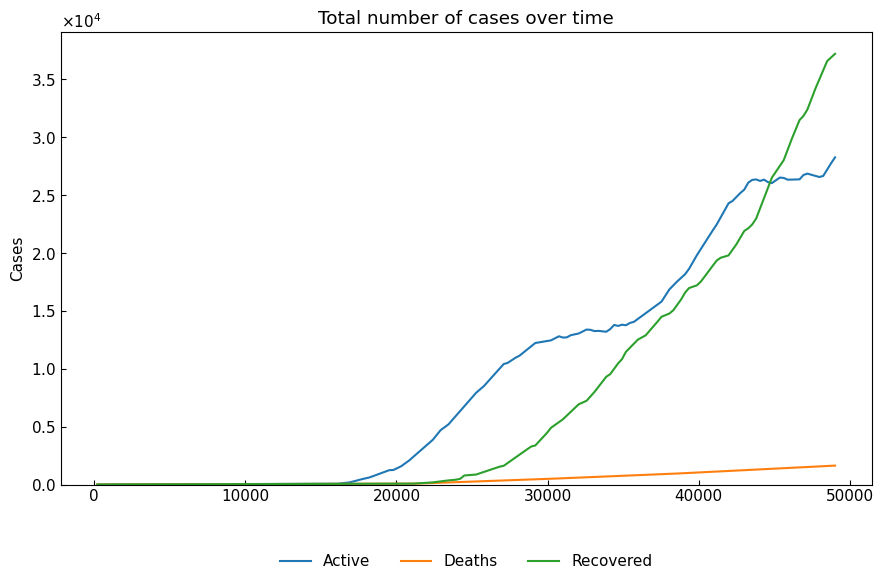

In [8]:
cs.line_plot(ukraine_data[["Active", "Deaths", "Recovered"]], "Total number of cases over time")

In [9]:
jhu_first_date, jhu_last_date = ukraine_data["Date"].min(), ukraine_data["Date"].max()
print(jhu_first_date, jhu_last_date)

2020-01-22 2020-07-27


In [10]:
data_cols = ["Confirmed", "Deaths", "Recovered"]
rate_cols = ["Deaths per Confirmed", "Recovered per Confirmed", "Deaths per (Deaths or Recovered)"]

ukraine_data['Deaths per Confirmed'] = ukraine_data['Deaths'] / ukraine_data['Confirmed']
ukraine_data['Recovered per Confirmed'] = ukraine_data['Recovered'] / ukraine_data['Confirmed']
ukraine_data['Deaths per (Deaths or Recovered)'] = ukraine_data['Deaths'] / (ukraine_data['Deaths'] + ukraine_data['Recovered'])

print(ukraine_data)

      Country/Region        Date  Confirmed  Deaths  Recovered  Active  \
213          Ukraine  2020-01-22          0       0          0       0   
474          Ukraine  2020-01-23          0       0          0       0   
735          Ukraine  2020-01-24          0       0          0       0   
996          Ukraine  2020-01-25          0       0          0       0   
1257         Ukraine  2020-01-26          0       0          0       0   
...              ...         ...        ...     ...        ...     ...   
47976        Ukraine  2020-07-23      63169    1570      35035   26564   
48237        Ukraine  2020-07-24      64173    1591      35932   26650   
48498        Ukraine  2020-07-25      65317    1610      36573   27134   
48759        Ukraine  2020-07-26      66261    1625      36885   27751   
49020        Ukraine  2020-07-27      67096    1636      37202   28258   

       Deaths per Confirmed  Recovered per Confirmed  \
213                     NaN                      NaN   

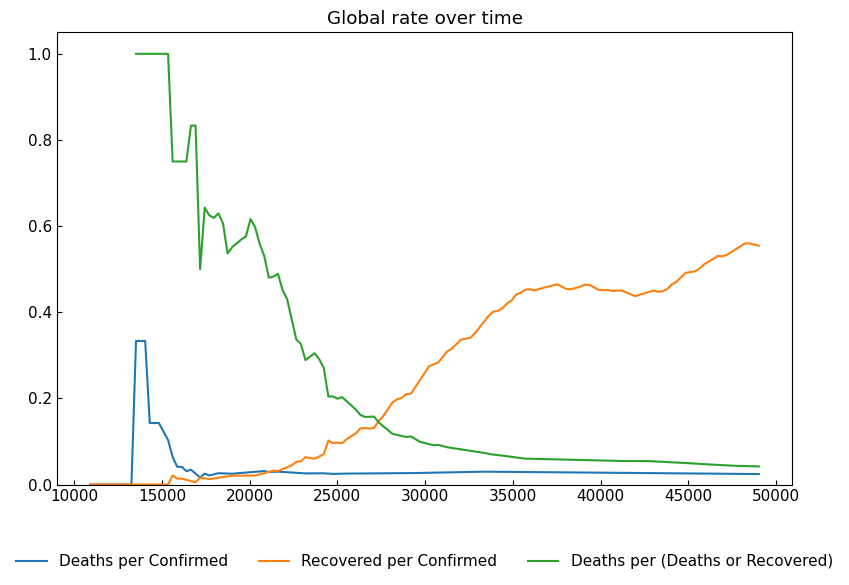

In [11]:

cs.line_plot(ukraine_data[rate_cols], "Global rate over time", ylabel="", math_scale=False)

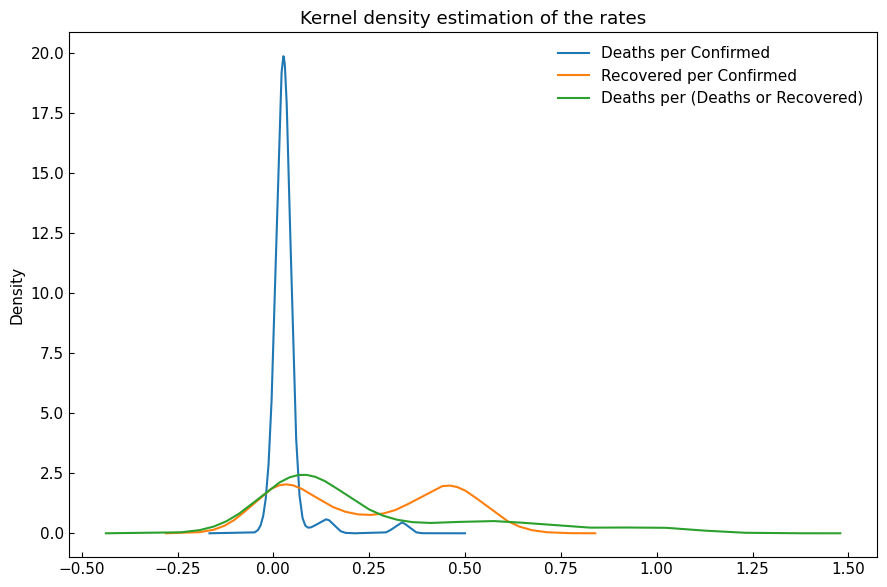

In [12]:
ukraine_data[rate_cols].plot.kde()
plt.title("Kernel density estimation of the rates")
plt.show()

In [13]:
ukraine_data[rate_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Deaths per Confirmed,147.0,0.035336,0.048025,0.000000,0.025204,0.026357,0.029061,0.333333
Recovered per Confirmed,147.0,0.251066,0.205150,0.000000,0.022596,0.258107,0.452076,0.559931
Deaths per (Deaths or Recovered),137.0,0.247018,0.284958,0.042124,0.055943,0.086516,0.384106,1.000000


In [14]:
data = ukraine_data[ukraine_data['Active'] != 0]
print(data)

      Country/Region        Date  Confirmed  Deaths  Recovered  Active  \
10914        Ukraine  2020-03-03          1       0          0       1   
11175        Ukraine  2020-03-04          1       0          0       1   
11436        Ukraine  2020-03-05          1       0          0       1   
11697        Ukraine  2020-03-06          1       0          0       1   
11958        Ukraine  2020-03-07          1       0          0       1   
...              ...         ...        ...     ...        ...     ...   
47976        Ukraine  2020-07-23      63169    1570      35035   26564   
48237        Ukraine  2020-07-24      64173    1591      35932   26650   
48498        Ukraine  2020-07-25      65317    1610      36573   27134   
48759        Ukraine  2020-07-26      66261    1625      36885   27751   
49020        Ukraine  2020-07-27      67096    1636      37202   28258   

       Deaths per Confirmed  Recovered per Confirmed  \
10914              0.000000                 0.000000   

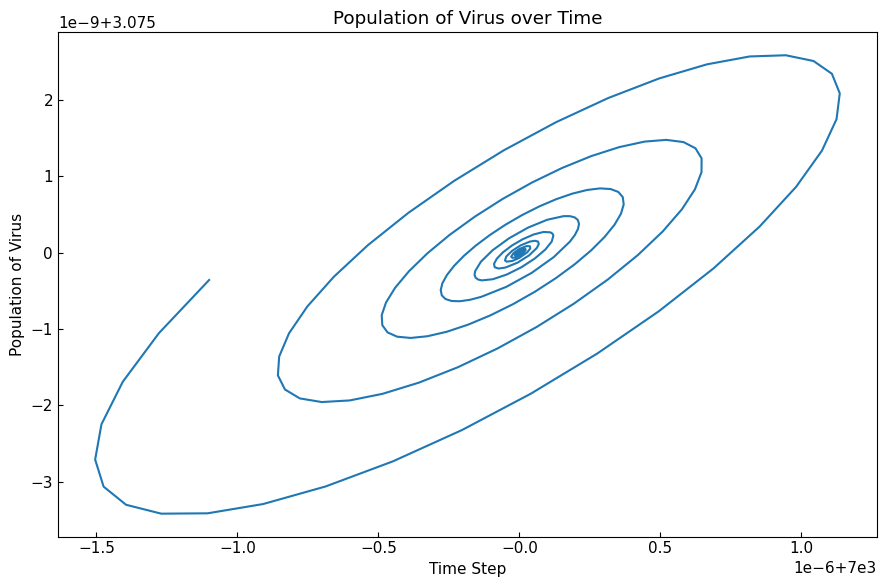

In [15]:
import numpy as np
import matplotlib.pyplot as plt

n = 4  
d = np.array([0.09, 0.01])
a, b, c = 0.1, 0.6, 0.1
N = 4000  
N_start, N_stop = 1000, 4000
v = 1 
P = np.array([7000, 7000, 7000, 7000])
Q = np.array([3, 3, 3, 3.3])
R = np.array([49.5, 49.5, 49.5, 49.7])

Pow_plot = np.zeros(N)
T = np.zeros(N)

for k in range(N):
    MSUM_P = P.sum()
    MSUM_Q = Q.sum()
    MSUM_R = R.sum()

    # Quantity change
    P_temp = P + d[0] * (R - Q)
    Q_temp = Q + d[1] * (R - Q)
    R_temp = R + (1 / d[1]) * Q / P

    # Normalize
    Q_n = Q_temp / MSUM_Q
    R_n = R_temp / MSUM_R
    P_n = P_temp / MSUM_P

    # Conflict interaction
    SUM_P = 0
    SUM_Q = 0
    SUM_R = 0

    for i in range(n):
        P_temp[i] = P_n[i] * (1 + a * (R_n[i] - Q_n[i]))  # People-Virus
        Q_temp[i] = Q_n[i] * (1 + (1 / c) * P_n[i] - b * R_n[i])
        R_temp[i] = R_n[i] * (1 - b * Q_n[i] - c * P_n[i])

        SUM_P += P_temp[i]
        SUM_Q += Q_temp[i]
        SUM_R += R_temp[i]

    # Normalize
    Q_n = Q_temp / SUM_Q
    P_n = P_temp / SUM_P
    R_n = R_temp / SUM_R

    # Back to quantity
    P = P_n * MSUM_P
    R = R_n * MSUM_R
    Q = Q_n * MSUM_Q

    Pow_plot[k] = Q[v]  # Coordinates for plotting Virus/People
    T[k] = P[v]

# Matrix of steps
# T = np.arange(1, N + 1)

T_view = T[N_start:N_stop]
Pow_view = Pow_plot[N_start:N_stop]

# Plotting
plt.plot(T_view, Pow_view)
plt.xlabel('Time Step')
plt.ylabel('Population of Virus')
plt.title('Population of Virus over Time')
plt.show()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 4  

a = np.array([1,2,3,4])
b = np.array([1,2,3,4])
c = np.array([1,2,3,4])
d = np.array([1,2])

N = 4000  
N_start, N_stop = 1000, 4000
v = 1 

S = np.array([7000, 7000, 7000, 7000])  # Сприйнятливі 
E = np.array([3, 3, 3, 3.3])            # Незаразний
Is = np.array([7000, 7000, 7000, 7000]) # Інфіковані люди, які ігнорують симптоми
I = np.array([3, 3, 3, 3.3])            # Інфіковані 
Iw = np.array([7000, 7000, 7000, 7000]) # Безсимптомні інфіковані 
Q = np.array([3, 3, 3, 3.3])            # У карантинi
Q_ = np.array([7000, 7000, 7000, 7000]) # У відділенні інтенсивної терапії 
C = np.array([7000, 7000, 7000, 7000])  # Носії
R = np.array([3, 3, 3, 3.3])            # Одужали 
Rd = np.array([7000, 7000, 7000, 7000]) # Одужали знерухомлені
D = np.array([3, 3, 3, 3.3])            # Смерті


for t in range(N):
    MSUM_S = S.sum() 
    MSUM_E = E.sum()
    MSUM_Is = Is.sum()
    MSUM_I = I.sum() 
    Iw = np.array([7000, 7000, 7000, 7000]) # Безсимптомні інфіковані 
    Q = np.array([3, 3, 3, 3.3])            # У карантинi
    Q_ = np.array([7000, 7000, 7000, 7000]) # У відділенні інтенсивної терапії 
    C = np.array([7000, 7000, 7000, 7000])  # Носії
    R = np.array([3, 3, 3, 3.3])            # Одужали 
    Rd = np.array([7000, 7000, 7000, 7000]) # Одужали знерухомлені
    D = np.array([3, 3, 3, 3.3])
    

             id        date  confirmed    deaths  recovered  tests  vaccines  \
96112  5f04e56c  2020-01-03        NaN       NaN        NaN    NaN       NaN   
96113  5f04e56c  2020-01-04        NaN       NaN        NaN    NaN       NaN   
96114  5f04e56c  2020-01-05        NaN       NaN        NaN    NaN       NaN   
96115  5f04e56c  2020-01-06        NaN       NaN        NaN    NaN       NaN   
96116  5f04e56c  2020-01-07        NaN       NaN        NaN    NaN       NaN   
...         ...         ...        ...       ...        ...    ...       ...   
97269  5f04e56c  2023-03-05  5701743.0  119213.0        NaN    NaN       NaN   
97270  5f04e56c  2023-03-06  5701855.0  119216.0        NaN    NaN       NaN   
97271  5f04e56c  2023-03-07  5701959.0  119217.0        NaN    NaN       NaN   
97272  5f04e56c  2023-03-08  5711818.0  119281.0        NaN    NaN       NaN   
97273  5f04e56c  2023-03-09  5711929.0  119283.0        NaN    NaN       NaN   

       people_vaccinated  people_fully_

C:\Users\afedy\AppData\Local\Temp\ipykernel_26472\2396221263.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("1.csv")


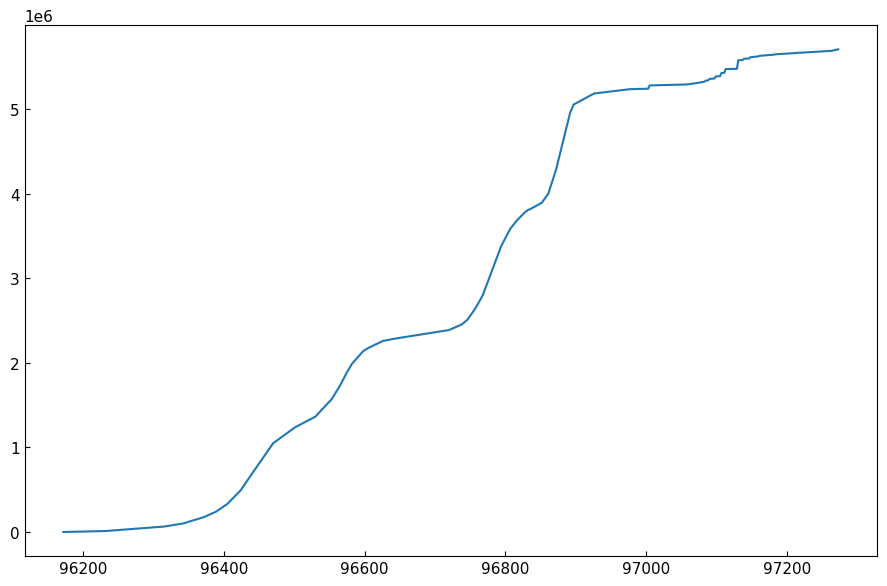

In [28]:
df1 = pd.read_csv("1.csv")

ukraine_data = df1[df1['key_apple_mobility'] == 'Ukraine']
data = ukraine_data[ukraine_data['confirmed'] != '']
print(data)

plt.plot(data.index, data['confirmed'])